In [1]:
import torch

In [3]:
a = torch.tensor([1,2,3])
a

tensor([1, 2, 3])

In [7]:
b = torch.tensor([[1,2,3],[4,5,6]])
b

tensor([[1, 2, 3],
        [4, 5, 6]])

In [14]:
zeros  = torch.zeros([3,4])
ones = torch.ones(2,2,3)
rand = torch.rand(3,3)
randn = torch.randn(3,3)

In [18]:
x = torch.rand(2,3,4)

x.shape, x.size(), x.dim()

(torch.Size([2, 3, 4]), torch.Size([2, 3, 4]), 3)

In [21]:
y = x.view(6,4)
y = x.reshape(6, 4) 

In [23]:
x = torch.rand(3, 4)
x

tensor([[0.6699, 0.0791, 0.3302, 0.0463],
        [0.6947, 0.6118, 0.7816, 0.1623],
        [0.2472, 0.7928, 0.3568, 0.6622]])

In [25]:
row_sums = x.sum(dim=1)
row_sums

tensor([1.1256, 2.2505, 2.0589])

In [27]:
col_sums = x.sum(dim=0) 
col_sums

tensor([1.6118, 1.4838, 1.4687, 0.8708])

In [28]:
keep_dim = x.sum(dim=1, keepdim=True) 
keep_dim

tensor([[1.1256],
        [2.2505],
        [2.0589]])

In [29]:
x = torch.rand(5, 6)

In [31]:
a = x[0]  # First row

In [32]:
x = torch.rand(5, 6)

In [1]:
vocab_size = 50257
context_length = 1024
num_layer = 48
d_model = 1600
num_heads = 25
d_ff = 1600

In [2]:
embeding = vocab_size * d_model

transformer_blocks_rms = 2 * d_model
transformer_blocks_ff = 3 * d_ff * d_model
transformer_blocks_MHA = 4 * d_model * d_model
transformer_blocks = num_layer * (
    transformer_blocks_rms + transformer_blocks_ff + transformer_blocks_MHA
)

rms_norm = d_model
lm_head = d_model * vocab_size

In [12]:
trainable_paras = sum([embeding, transformer_blocks, rms_norm, lm_head])
trainable_paras / 1000 / 1000 / 1000 # in Billion

1.0211376

In [11]:
Bytes_per_single_float = 4
memory =  trainable_paras * Bytes_per_single_float
memory / 1024 / 1024 / 1024 # in GB 

3.8040339946746826

In [13]:
3.8 * 1.5

5.699999999999999

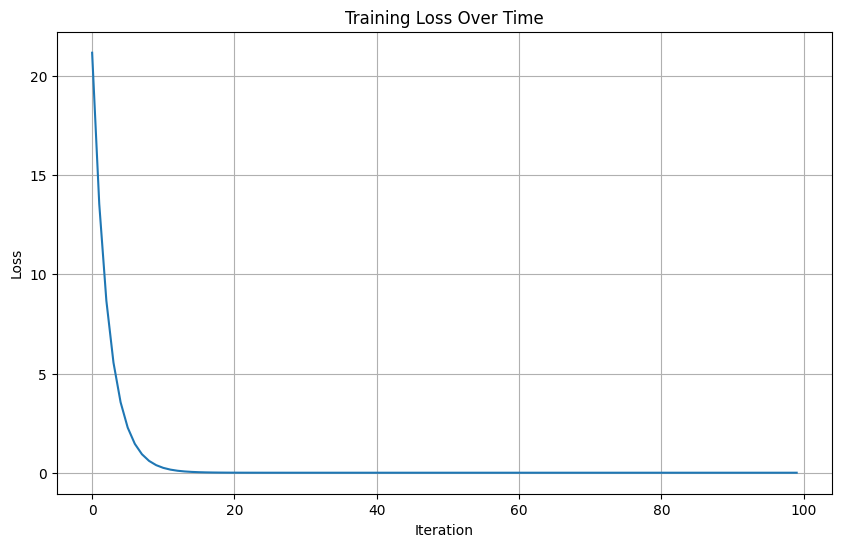

In [15]:
import torch
from torch import optim
import matplotlib.pyplot as plt

weights = torch.nn.Parameter(5 * torch.randn((10,10)))
lr = 1e1
opt = optim.SGD([weights],lr=lr)

loss_list = []
for t in range(100):
    opt.zero_grad()
    loss = (weights  ** 2).mean() 
    loss_list.append(loss.cpu().item())
    # print(loss.cpu().item())
    loss.backward()
    opt.step() 

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.title('Training Loss Over Time')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

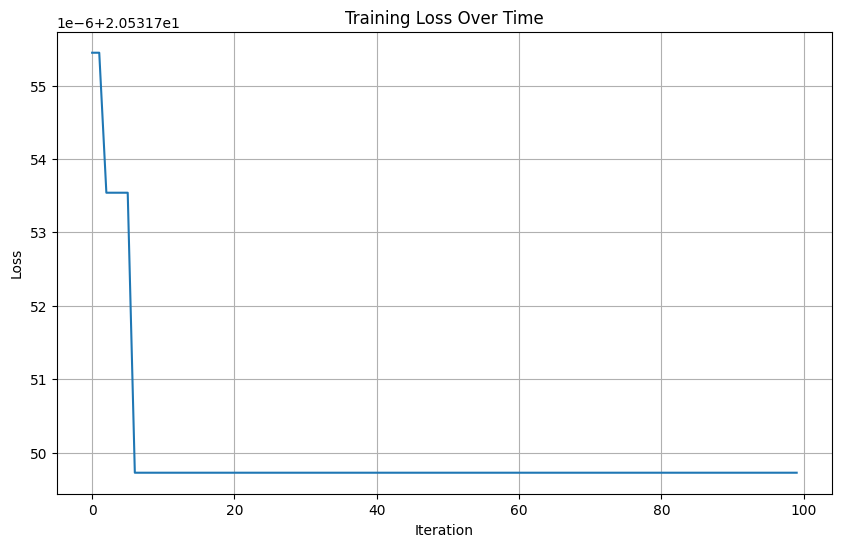

In [17]:
import torch
from torch import optim
import matplotlib.pyplot as plt

weights = torch.nn.Parameter(5 * torch.randn((10,10)))
lr = 1e2
opt = optim.SGD([weights],lr=lr)

loss_list = []
for t in range(100):
    opt.zero_grad()
    loss = (weights  ** 2).mean() 
    loss_list.append(loss.cpu().item())
    # print(loss.cpu().item())
    loss.backward()
    opt.step() 

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.title('Training Loss Over Time')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

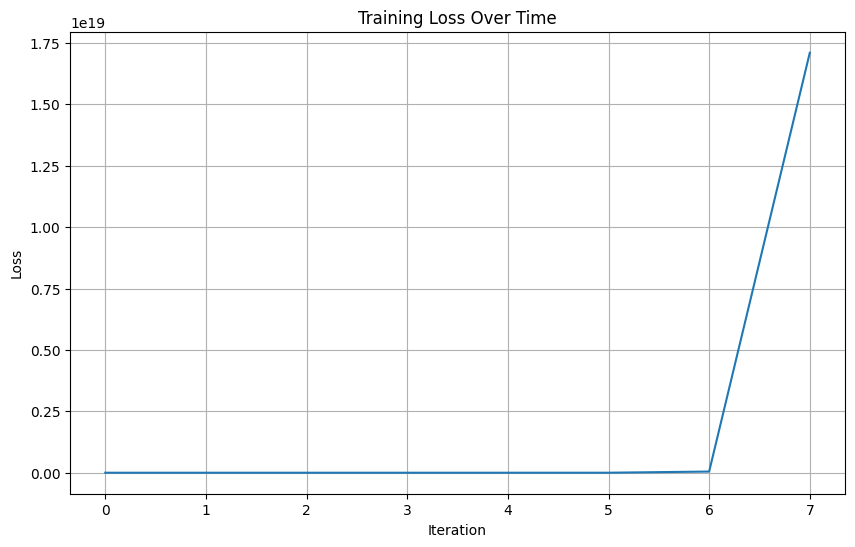

In [20]:
import torch
from torch import optim
import matplotlib.pyplot as plt

weights = torch.nn.Parameter(5 * torch.randn((10,10)))
lr = 1e3
opt = optim.SGD([weights],lr=lr)

loss_list = []
for t in range(100):
    opt.zero_grad()
    loss = (weights  ** 2).mean() 
    loss_list.append(loss.cpu().item())
    # print(loss.cpu().item())
    loss.backward()
    opt.step() 

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_list[:8])
plt.title('Training Loss Over Time')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

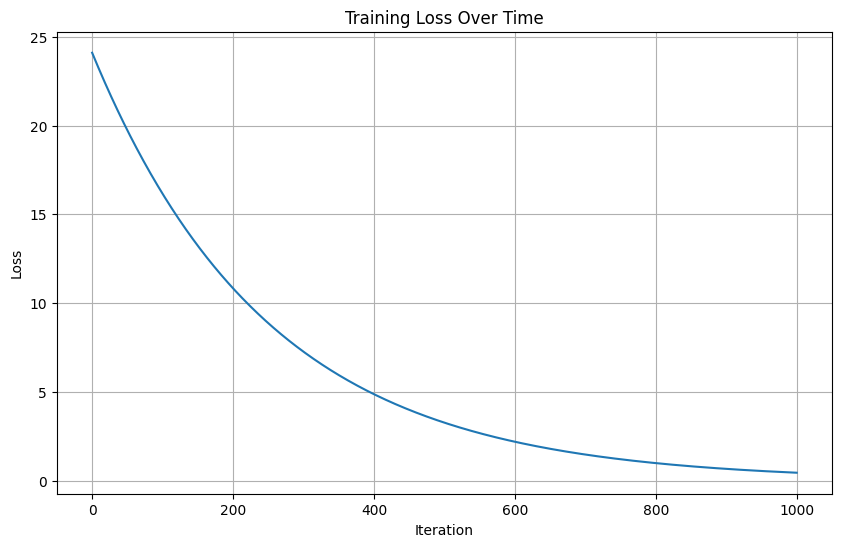

In [23]:
import torch
from torch import optim
import matplotlib.pyplot as plt

weights = torch.nn.Parameter(5 * torch.randn((10,10)))
lr = 1e-1
opt = optim.SGD([weights],lr=lr)

loss_list = []
for t in range(1000):
    opt.zero_grad()
    loss = (weights  ** 2).mean() 
    loss_list.append(loss.cpu().item())
    # print(loss.cpu().item())
    loss.backward()
    opt.step() 

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.title('Training Loss Over Time')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
import pprint

# Create a simple model to demonstrate
model = nn.Sequential(
    nn.Linear(3, 5, bias=True),
    nn.Linear(5, 2, bias=False)
)

print("="*60)
print("UNDERSTANDING PyTorch Optimizer Internals")
print("="*60)

# Create an optimizer
optimizer = Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), weight_decay=0.01)

print("\n1. INITIAL STATE AFTER OPTIMIZER CREATION:")
print("-" * 50)

print(f"Number of parameter groups: {len(optimizer.param_groups)}")
print(f"State dictionary keys: {list(optimizer.state.keys())}")
print(f"State is empty initially: {len(optimizer.state) == 0}")

UNDERSTANDING PyTorch Optimizer Internals

1. INITIAL STATE AFTER OPTIMIZER CREATION:
--------------------------------------------------
Number of parameter groups: 1
State dictionary keys: []
State is empty initially: True


In [3]:
print("\n2. EXAMINING param_groups STRUCTURE:")
print("-" * 50)

print("param_groups is a list of dictionaries, each containing:")
for i, group in enumerate(optimizer.param_groups):
    print(f"\nGroup {i}:")
    print(f"  - Number of parameters: {len(group['params'])}")
    print(f"  - Hyperparameters stored:")
    for key, value in group.items():
        if key != 'params':  # Skip the actual parameter tensors for readability
            print(f"    {key}: {value}")
    
    print(f"  - Parameter shapes in this group:")
    for j, param in enumerate(group['params']):
        print(f"    param_{j}: shape={param.shape}, requires_grad={param.requires_grad}")


2. EXAMINING param_groups STRUCTURE:
--------------------------------------------------
param_groups is a list of dictionaries, each containing:

Group 0:
  - Number of parameters: 3
  - Hyperparameters stored:
    lr: 0.01
    betas: (0.9, 0.999)
    eps: 1e-08
    weight_decay: 0.01
    amsgrad: False
    maximize: False
    foreach: None
    capturable: False
    differentiable: False
    fused: None
  - Parameter shapes in this group:
    param_0: shape=torch.Size([5, 3]), requires_grad=True
    param_1: shape=torch.Size([5]), requires_grad=True
    param_2: shape=torch.Size([2, 5]), requires_grad=True


In [ ]:
print("\n3. AFTER ONE OPTIMIZATION STEP:")
print("-" * 50)

# Create dummy data and perform one optimization step
x = torch.randn(10, 3)
y = torch.randn(10, 2)
loss_fn = nn.MSELoss()

# Forward pass
output = model(x)
loss = loss_fn(output, y)

# Backward pass
optimizer.zero_grad()
loss.backward()
optimizer.step()  # This populates the state!

print(f"State dictionary now has {len(optimizer.state)} entries")
print("State keys (these are parameter tensor objects):")
for i, (param_tensor, state_info) in enumerate(optimizer.state.items()):
    print(f"  Parameter {i}: shape={param_tensor.shape}")
    print(f"    State contains: {list(state_info.keys())}")
    print(f"    Step count: {state_info.get('step', 'N/A')}")

print("\n4. DETAILED STATE INSPECTION:")
print("-" * 50)

for i, (param_tensor, state_info) in enumerate(optimizer.state.items()):
    print(f"\nParameter {i} (shape: {param_tensor.shape}):")
    for key, value in state_info.items():
        if key == 'step':
            print(f"  {key}: {value}")
        else:  # For tensors like exp_avg, exp_avg_sq
            print(f"  {key}: tensor with shape {value.shape}, mean={value.mean():.6f}")

print("\n5. MULTIPLE PARAMETER GROUPS EXAMPLE:")
print("-" * 50)

# Create model with different parameter groups
model2 = nn.Sequential(
    nn.Linear(3, 5),
    nn.Linear(5, 2)
)

# Create optimizer with different learning rates for different layers
optimizer2 = SGD([
    {'params': model2[0].parameters(), 'lr': 0.01, 'momentum': 0.9},
    {'params': model2[1].parameters(), 'lr': 0.001, 'momentum': 0.95, 'weight_decay': 0.01}
], lr=0.1)  # Default lr, will be overridden by group-specific lr

print(f"Number of parameter groups: {len(optimizer2.param_groups)}")

for i, group in enumerate(optimizer2.param_groups):
    print(f"\nGroup {i}:")
    print(f"  Parameters: {len(group['params'])}")
    print(f"  Learning rate: {group['lr']}")
    print(f"  Momentum: {group['momentum']}")
    if 'weight_decay' in group:
        print(f"  Weight decay: {group['weight_decay']}")

print("\n6. KEY INSIGHTS:")
print("-" * 50)
print("""
param_groups: List of dictionaries containing:
  - 'params': List of parameter tensors to optimize
  - Hyperparameters: lr, momentum, weight_decay, etc.
  - Allows different hyperparameters for different parameter groups

state: Dictionary mapping parameter tensors to their optimizer state:
  - Key: The actual parameter tensor object (unique identifier)
  - Value: Dictionary with optimizer-specific state information
    * For Adam: 'step', 'exp_avg', 'exp_avg_sq', (optionally 'max_exp_avg_sq')
    * For SGD with momentum: 'momentum_buffer'
    * For RMSprop: 'step', 'square_avg', (optionally 'momentum_buffer', 'grad_avg')

The state persists across optimization steps and stores:
  - Step counters
  - Momentum terms
  - Moving averages
  - Any other algorithm-specific history needed for the update rule
""")

print("\n7. PRACTICAL USAGE PATTERNS:")
print("-" * 50)

print("Common ways to create parameter groups:")
print("""
# Different learning rates for different layers:
optimizer = torch.optim.Adam([
    {'params': model.backbone.parameters(), 'lr': 1e-4},
    {'params': model.classifier.parameters(), 'lr': 1e-3}
])

# Exclude certain parameters from weight decay:
optimizer = torch.optim.AdamW([
    {'params': [p for p in model.parameters() if p.requires_grad and len(p.shape) > 1], 'weight_decay': 0.01},
    {'params': [p for p in model.parameters() if p.requires_grad and len(p.shape) <= 1], 'weight_decay': 0.0}
])
""")